Środek danych (xC): [1.01052871 0.74886015]
Długości osi głównych (sig): [2.00335079 1.01686974]
Kąt obrotu (rad): 1.9607
Kąt obrotu (stopnie): 112.34°


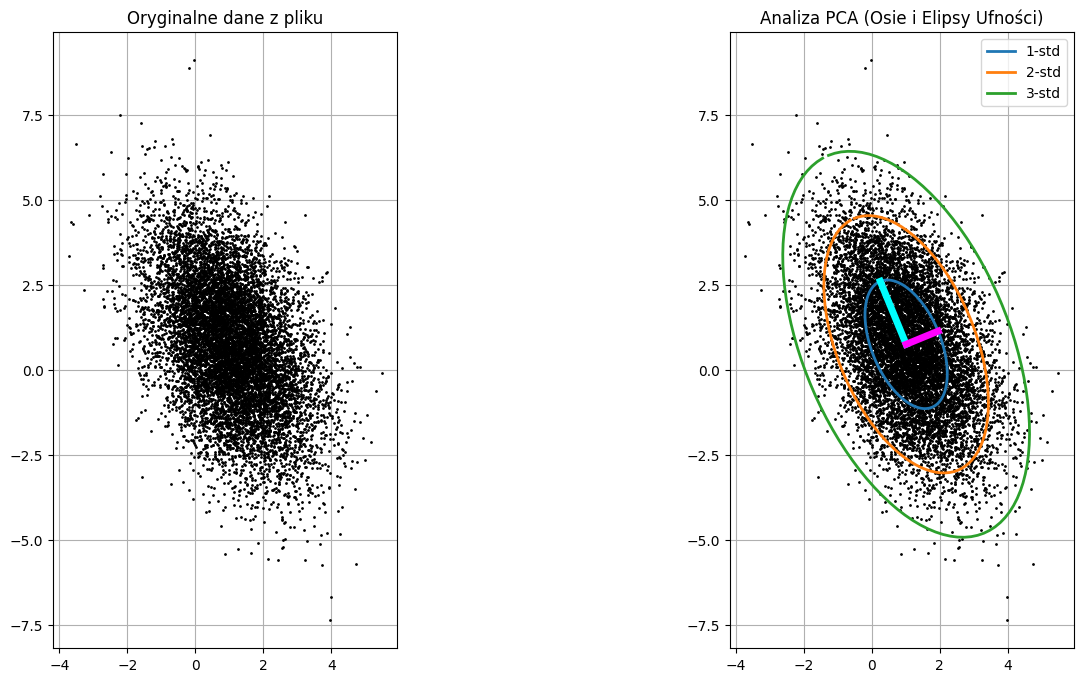

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [16, 8]

data = pd.read_csv('8.csv', header=None).values

if data.shape[0] != 2:
    X = data.T
else:
    X = data

nPoints = X.shape[1]

# 1. Obliczenie środka danych (mean)
Xavg = np.mean(X, axis=1)
print(f"Środek danych (xC): {Xavg}")

# 2. Odjęcie średniej (centrowanie danych)
B = X - np.tile(Xavg, (nPoints, 1)).T

# 3. Znalezienie składowych głównych za pomocą SVD
U, S, VT = np.linalg.svd(B / np.sqrt(nPoints), full_matrices=0)

# 4. Wyznaczenie osi i kąta
print(f"Długości osi głównych (sig): {S}")

# Kąt obrotu wyznaczamy z pierwszego wektora własnego 
theta_est = np.arctan2(U[1, 0], U[0, 0])
print(f"Kąt obrotu (rad): {theta_est:.4f}")
print(f"Kąt obrotu (stopnie): {np.degrees(theta_est):.2f}°")

fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.plot(X[0,:], X[1,:], '.', color='k', markersize=2)
ax1.grid()
ax1.set_title("Oryginalne dane z pliku")
ax1.set_aspect('equal')

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:], X[1,:], '.', color='k', markersize=2)
ax2.grid()
ax2.set_aspect('equal')
ax2.set_title("Analiza PCA (Osie i Elipsy Ufności)")

# Rysowanie elips ufności (1, 2 i 3 odchylenia standardowe)
theta_circ = 2 * np.pi * np.arange(0, 1, 0.01)
Xstd = U @ np.diag(S) @ np.array([np.cos(theta_circ), np.sin(theta_circ)])

for i in [1, 2, 3]:
    ax2.plot(Xavg[0] + i * Xstd[0,:], Xavg[1] + i * Xstd[1,:], '-', linewidth=2, label=f'{i}-std')

# Rysowanie wektorów osi głównych (skalowane przez S)
ax2.plot(np.array([Xavg[0], Xavg[0] + U[0,0] * S[0]]),
         np.array([Xavg[1], Xavg[1] + U[1,0] * S[0]]), '-', color='cyan', linewidth=5)
ax2.plot(np.array([Xavg[0], Xavg[0] + U[0,1] * S[1]]),
         np.array([Xavg[1], Xavg[1] + U[1,1] * S[1]]), '-', color='magenta', linewidth=5)

plt.legend()
plt.show()